# Data and Library Insertion

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Preprocessing

In [ ]:
# check dimensionality
print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1] )

Number of rows: 253680
Number of features/columns: 22


In [ ]:
#missing value
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#duplicate
print("Total duplicated rows: ", sum(df.duplicated()))

# drop duplicates
df = df.drop_duplicates()

Total duplicated rows:  24206


duplicated form

In [ ]:
# List of binary, ordinal & numerical features
target = ['Diabetes_binary']
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
diabetes_ordinal = ['GenHlth', 'Age', 'Education', 'Income'] 
diabetes_numerical = ['BMI', 'MentHlth', 'PhysHlth']

In [ ]:
#check unique values for each attribute (target variable)
for i in target:
  values = df[i].unique().tolist()
  print(i,': ',values)

#check unique values for each attribute (binary variable)
for i in binary_features:
  values = df[i].unique().tolist()
  print(i,': ',values)

#check unique values for each attribute (ordinal variable)
for i in diabetes_ordinal:
  values = df[i].unique().tolist()
  print(i,': ',values)


#check unique values for each attribute (numerical variable)
for i in diabetes_numerical:
  values = df[i].unique().tolist()
  print(i,': ',values)

Diabetes_binary :  [0.0, 1.0]
HighBP :  [1.0, 0.0]
HighChol :  [1.0, 0.0]
CholCheck :  [1.0, 0.0]
Smoker :  [1.0, 0.0]
Stroke :  [0.0, 1.0]
HeartDiseaseorAttack :  [0.0, 1.0]
PhysActivity :  [0.0, 1.0]
Fruits :  [0.0, 1.0]
Veggies :  [1.0, 0.0]
HvyAlcoholConsump :  [0.0, 1.0]
AnyHealthcare :  [1.0, 0.0]
NoDocbcCost :  [0.0, 1.0]
DiffWalk :  [1.0, 0.0]
Sex :  [0.0, 1.0]
GenHlth :  [5.0, 3.0, 2.0, 4.0, 1.0]
Age :  [9.0, 7.0, 11.0, 10.0, 8.0, 13.0, 4.0, 6.0, 2.0, 12.0, 5.0, 1.0, 3.0]
Education :  [4.0, 6.0, 3.0, 5.0, 2.0, 1.0]
Income :  [3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]
BMI :  [40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26.0, 33.0, 21.0, 23.0, 22.0, 38.0, 32.0, 37.0, 31.0, 29.0, 20.0, 35.0, 45.0, 39.0, 19.0, 47.0, 18.0, 36.0, 43.0, 55.0, 49.0, 42.0, 17.0, 16.0, 41.0, 44.0, 50.0, 59.0, 48.0, 52.0, 46.0, 54.0, 57.0, 53.0, 14.0, 15.0, 51.0, 58.0, 63.0, 61.0, 56.0, 74.0, 62.0, 64.0, 66.0, 73.0, 85.0, 60.0, 67.0, 65.0, 70.0, 82.0, 79.0, 92.0, 68.0, 72.0, 88.0, 96.0, 13.0, 81.0, 71.0, 75.

In [ ]:
#check data types
df.dtypes

Diabetes_binary           int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object

In [ ]:
# change attributes to integer
# Set all columns except for "BMI" to int type
columns_to_convert = df.columns.difference(['BMI'])
df[columns_to_convert] = df[columns_to_convert].astype(int)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  int64  
 1   HighBP                229474 non-null  int64  
 2   HighChol              229474 non-null  int64  
 3   CholCheck             229474 non-null  int64  
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  int64  
 6   Stroke                229474 non-null  int64  
 7   HeartDiseaseorAttack  229474 non-null  int64  
 8   PhysActivity          229474 non-null  int64  
 9   Fruits                229474 non-null  int64  
 10  Veggies               229474 non-null  int64  
 11  HvyAlcoholConsump     229474 non-null  int64  
 12  AnyHealthcare         229474 non-null  int64  
 13  NoDocbcCost           229474 non-null  int64  
 14  GenHlth               229474 non-null  int64  
 15  MentH

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# show the mean, std, min..max of dataset
df.select_dtypes(['int64','float64']).describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


EDA

In [ ]:
# EDA for all features (is there outliers)
# Binning : during EDA, bin attributes if necessary (not required in this project because data already binned)

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64


Text(0.5, 1.0, 'Diabetes_binary')

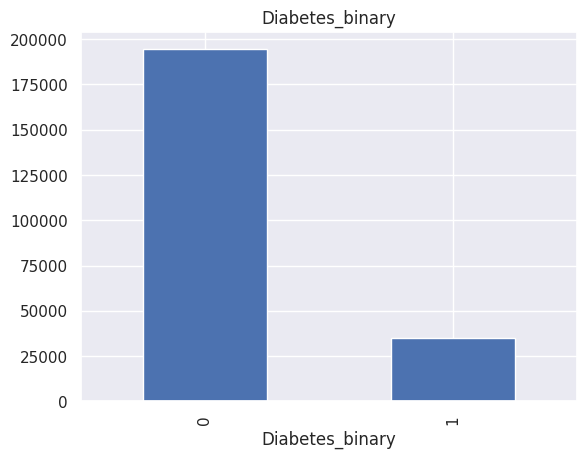

In [ ]:
target = df['Diabetes_binary']
print(target.value_counts())
target.value_counts().plot(kind="bar")
plt.title("Diabetes_binary")

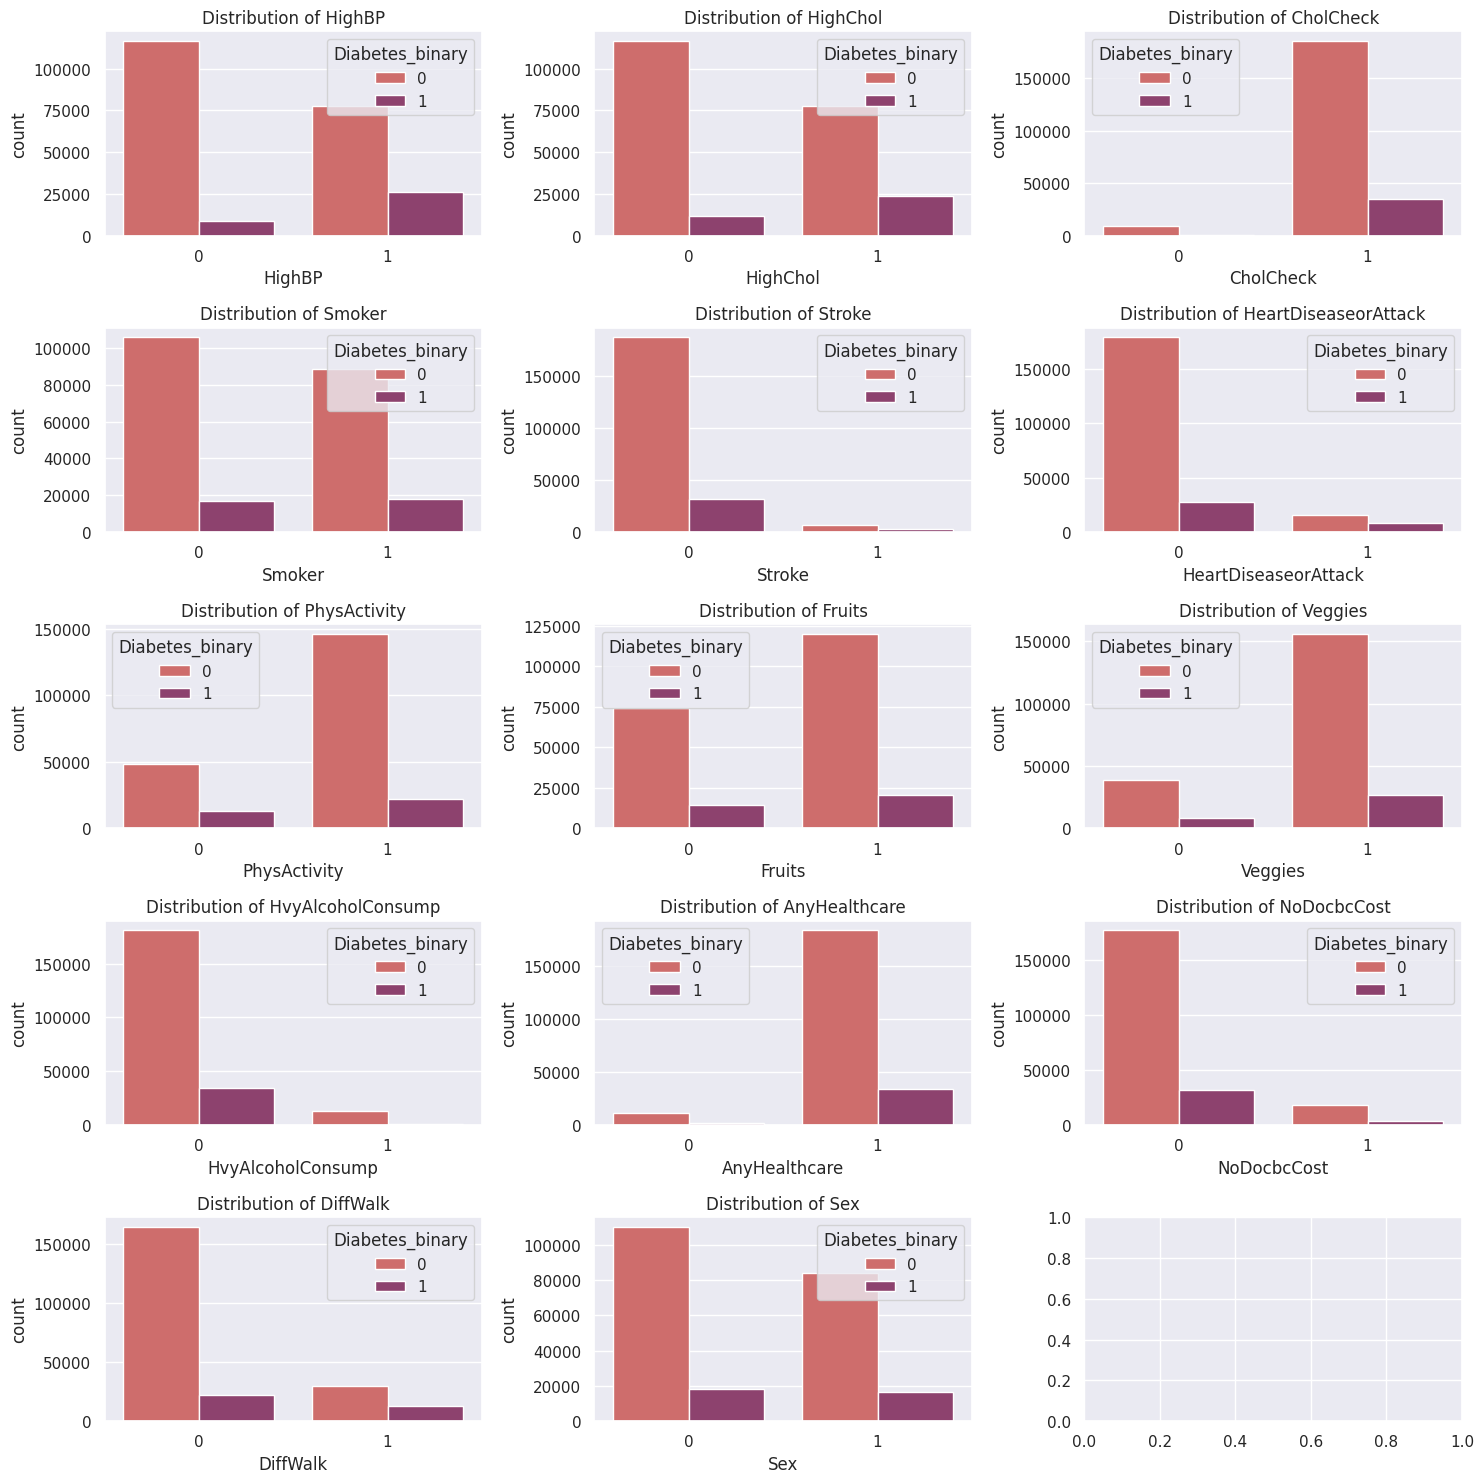

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(binary_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='flare')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

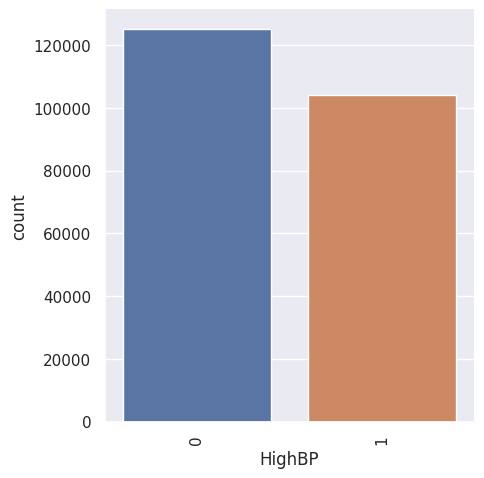

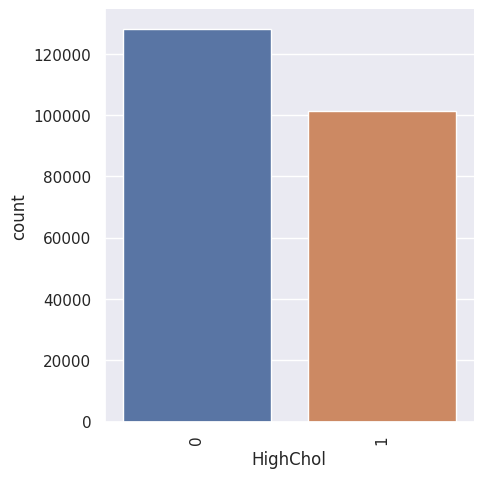

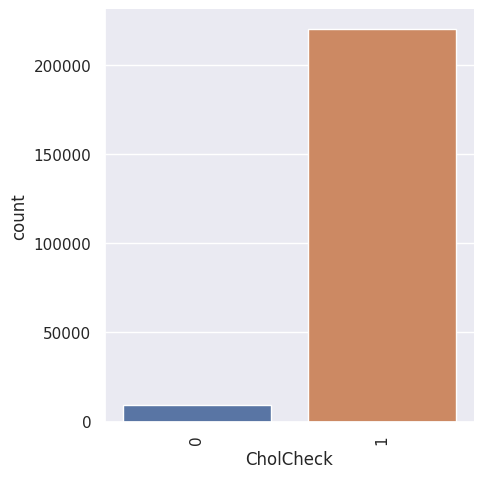

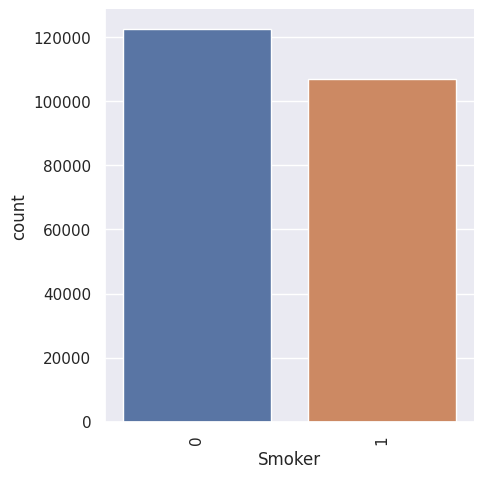

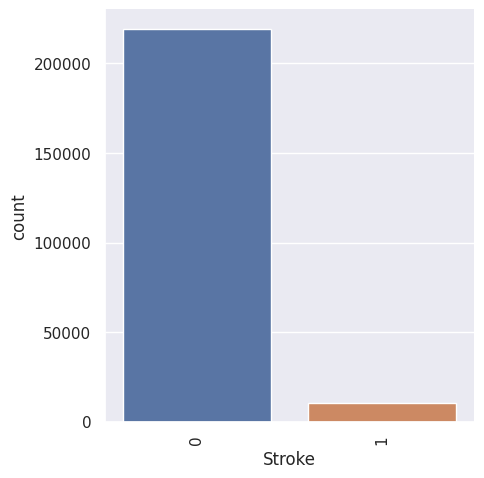

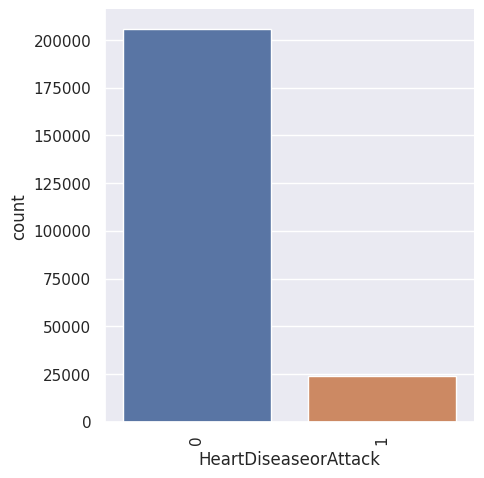

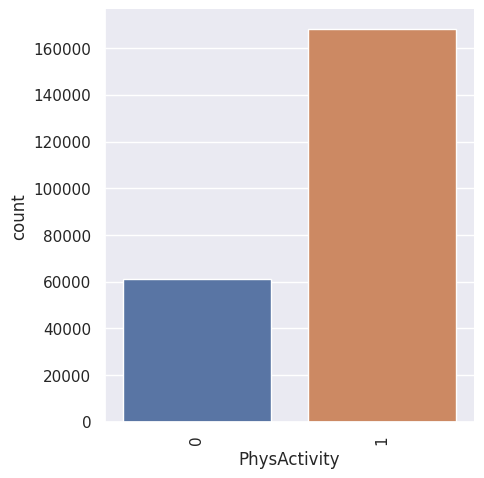

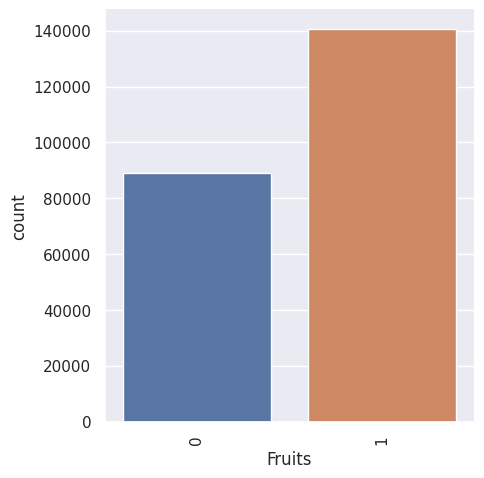

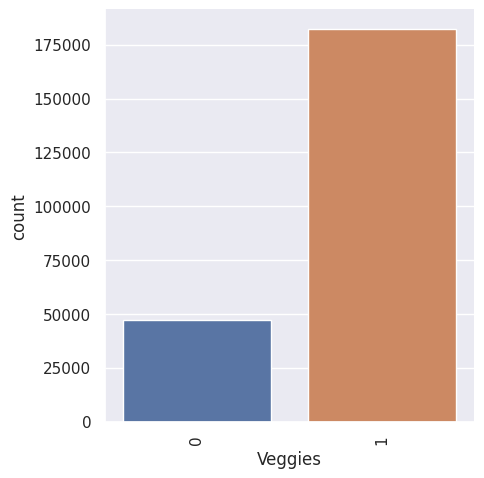

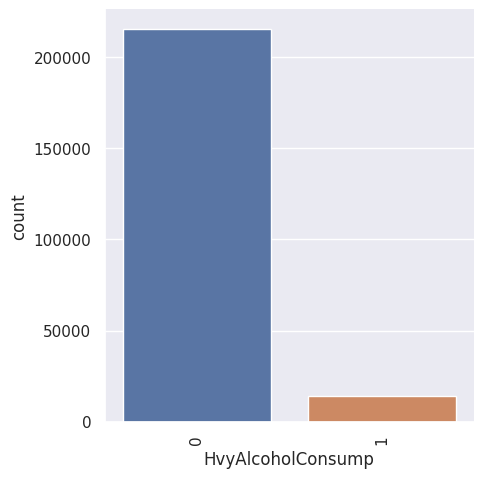

In [ ]:
for i in range(10):
  ax = sns.catplot(data=df,x=binary_features[i],kind='count')
  ax.set_xticklabels(rotation=90)

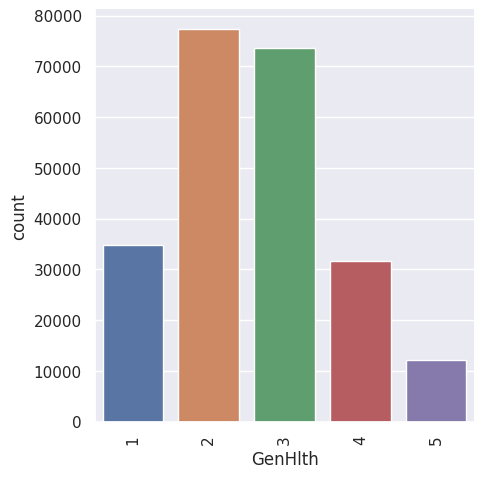

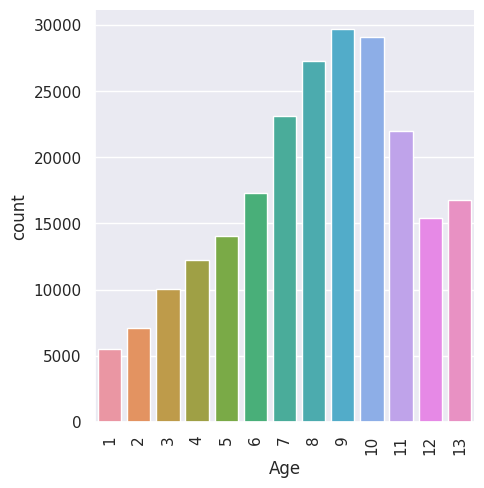

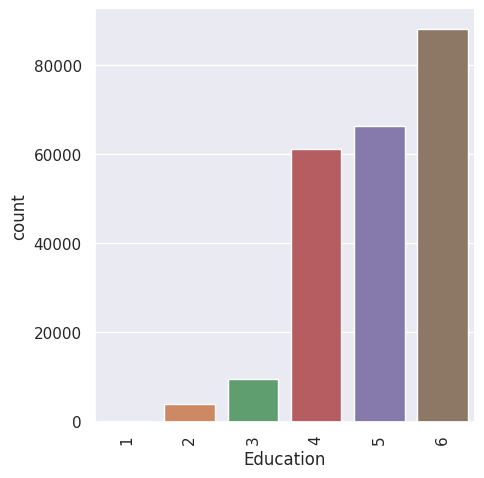

In [ ]:
for i in range(3):
  ax = sns.catplot(data=df,x=diabetes_ordinal[i],kind='count')
  ax.set_xticklabels(rotation=90)

Each attribute has varying degrees of imbalance, but it is not necessary to balance these as they are going to be used as features. More importantly is the balance of the target class for classifier training.

In [ ]:
#cleaned dataset
df_clean = df.copy()

Feature Engineering

 Now, perform Feature Engineering in order.
1. Data Splitting: training set and testing set 

2. Data Normalization (involve numerical variable)
3. balance / imbalance: use smote to balance (balance the target variable only)
4. impute: to handle null values (not required in this project because we dont have any null values)
5. timestamp: to handle time value (not required in this project because we dont have any time values)

## Data Splitting

In [ ]:
# Feature Engineering (1)---------------------------
# split dataset : train set and test set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


X = df_clean.loc[:, df_clean.columns != 'Diabetes_binary'] 
y = df_clean.loc[:, df_clean.columns == 'Diabetes_binary'] #Diabetes_binary = target
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)

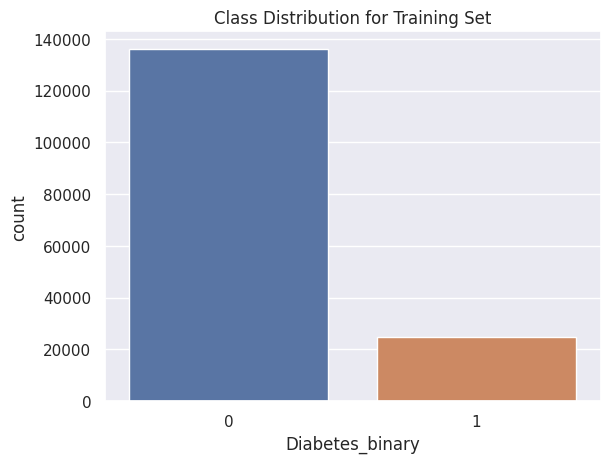

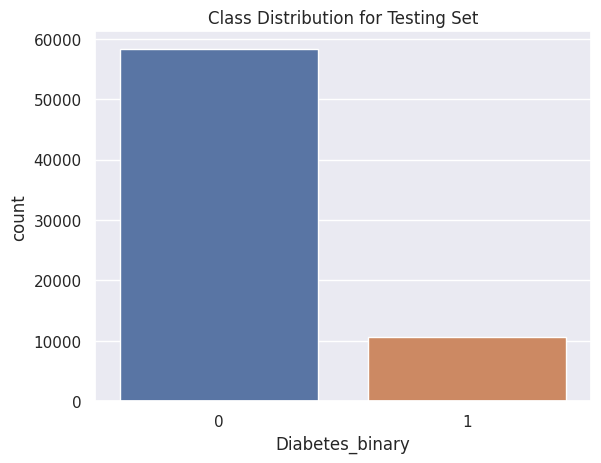

In [ ]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='Diabetes_binary', data = pd.DataFrame({'Diabetes_binary':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='Diabetes_binary', data = pd.DataFrame({'Diabetes_binary':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

In [ ]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 32.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Feature Engineering (2) ---------------------------
# Data normalization
# Normalize numerical attributes
from sklearn.preprocessing import MinMaxScaler

# Select the column to be scaled ('BMI' in this case)
column_to_scale = 'BMI'

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Reshape the selected column and scale it
X_train[column_to_scale] = min_max_scaler.fit_transform(X_train[[column_to_scale]])

# Display the modified X_train with scaled 'BMI' column
print(X_train)


        HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
23250        0         0          0  0.104651       1       0   
212275       0         1          1  0.313953       0       0   
169835       1         1          1  0.081395       1       1   
33150        0         1          1  0.127907       1       0   
2162         1         1          1  0.151163       0       0   
...        ...       ...        ...       ...     ...     ...   
14383        1         1          1  0.220930       0       0   
80282        1         1          1  0.232558       0       0   
12698        0         0          1  0.162791       0       0   
66536        0         1          1  0.232558       1       0   
93025        0         1          1  0.244186       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
23250                      0             1       1        1  ...   
212275                     0             0       0        0  ...   
169835         

We have split the original data into training and testing sets (X_train, X_test, y_train, y_test), and then the original data will be SMOTE only on the training set (X_train).

Apply SMOTE to the entire feature matrix X and target vector y, which results in resampled data (X_res, y_res). This approach resamples the entire dataset and ensures that the training data is balanced before splitting it into training and testing sets.

if you want to use SMOTE, replace X_train with X_res after applying SMOTE to the data as shown in below code:

## SMOTE Application

In [ ]:
# Feature Engineering (3)---------------------------
# SMOTE
import imblearn
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)
# Fit smote
X_res, y_res = smt.fit_resample(X_train, y_train)

In [ ]:
# Convert the NumPy array to a pandas DataFrame
y_res_df = pd.DataFrame(y_res, columns=['target'])

target
0         136063
1         136063
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

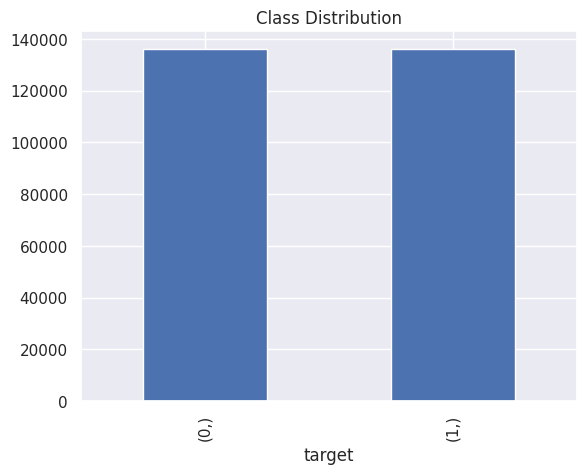

In [ ]:
print(y_res_df.value_counts())
y_res_df.value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [ ]:
# Data Encoding - Decoding (involve categorical variable - not required in this project because we already have binary values)

Feature Selection

In [ ]:
from sklearn.feature_selection import chi2 # chi-squared test
from sklearn.feature_selection import SelectKBest

select_feature = SelectKBest(chi2, k=5).fit(X_res, y_res) # select top 5 features with chi-squared test
# to check the most correlate attribute
kbest = np.asarray(X_res.columns)[select_feature.get_support()]
kbest

array(['HighBP', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age'], dtype=object)

<AxesSubplot: xlabel='score', ylabel='Feature'>

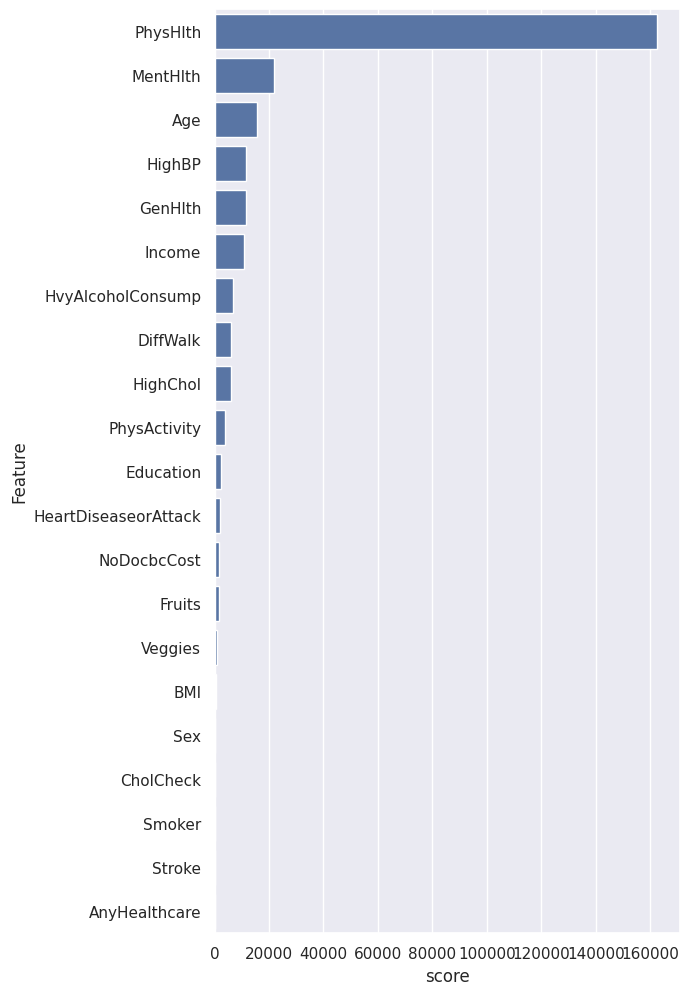

In [ ]:
score = pd.DataFrame(select_feature.scores_ , X_res.columns).sort_values(0, ascending=False).reset_index().rename(columns={0:"score", "index":"Feature"})

f, ax = plt.subplots(figsize=(6, 12))

sns.barplot(data=score, x="score", y="Feature", color="b")

<AxesSubplot: >

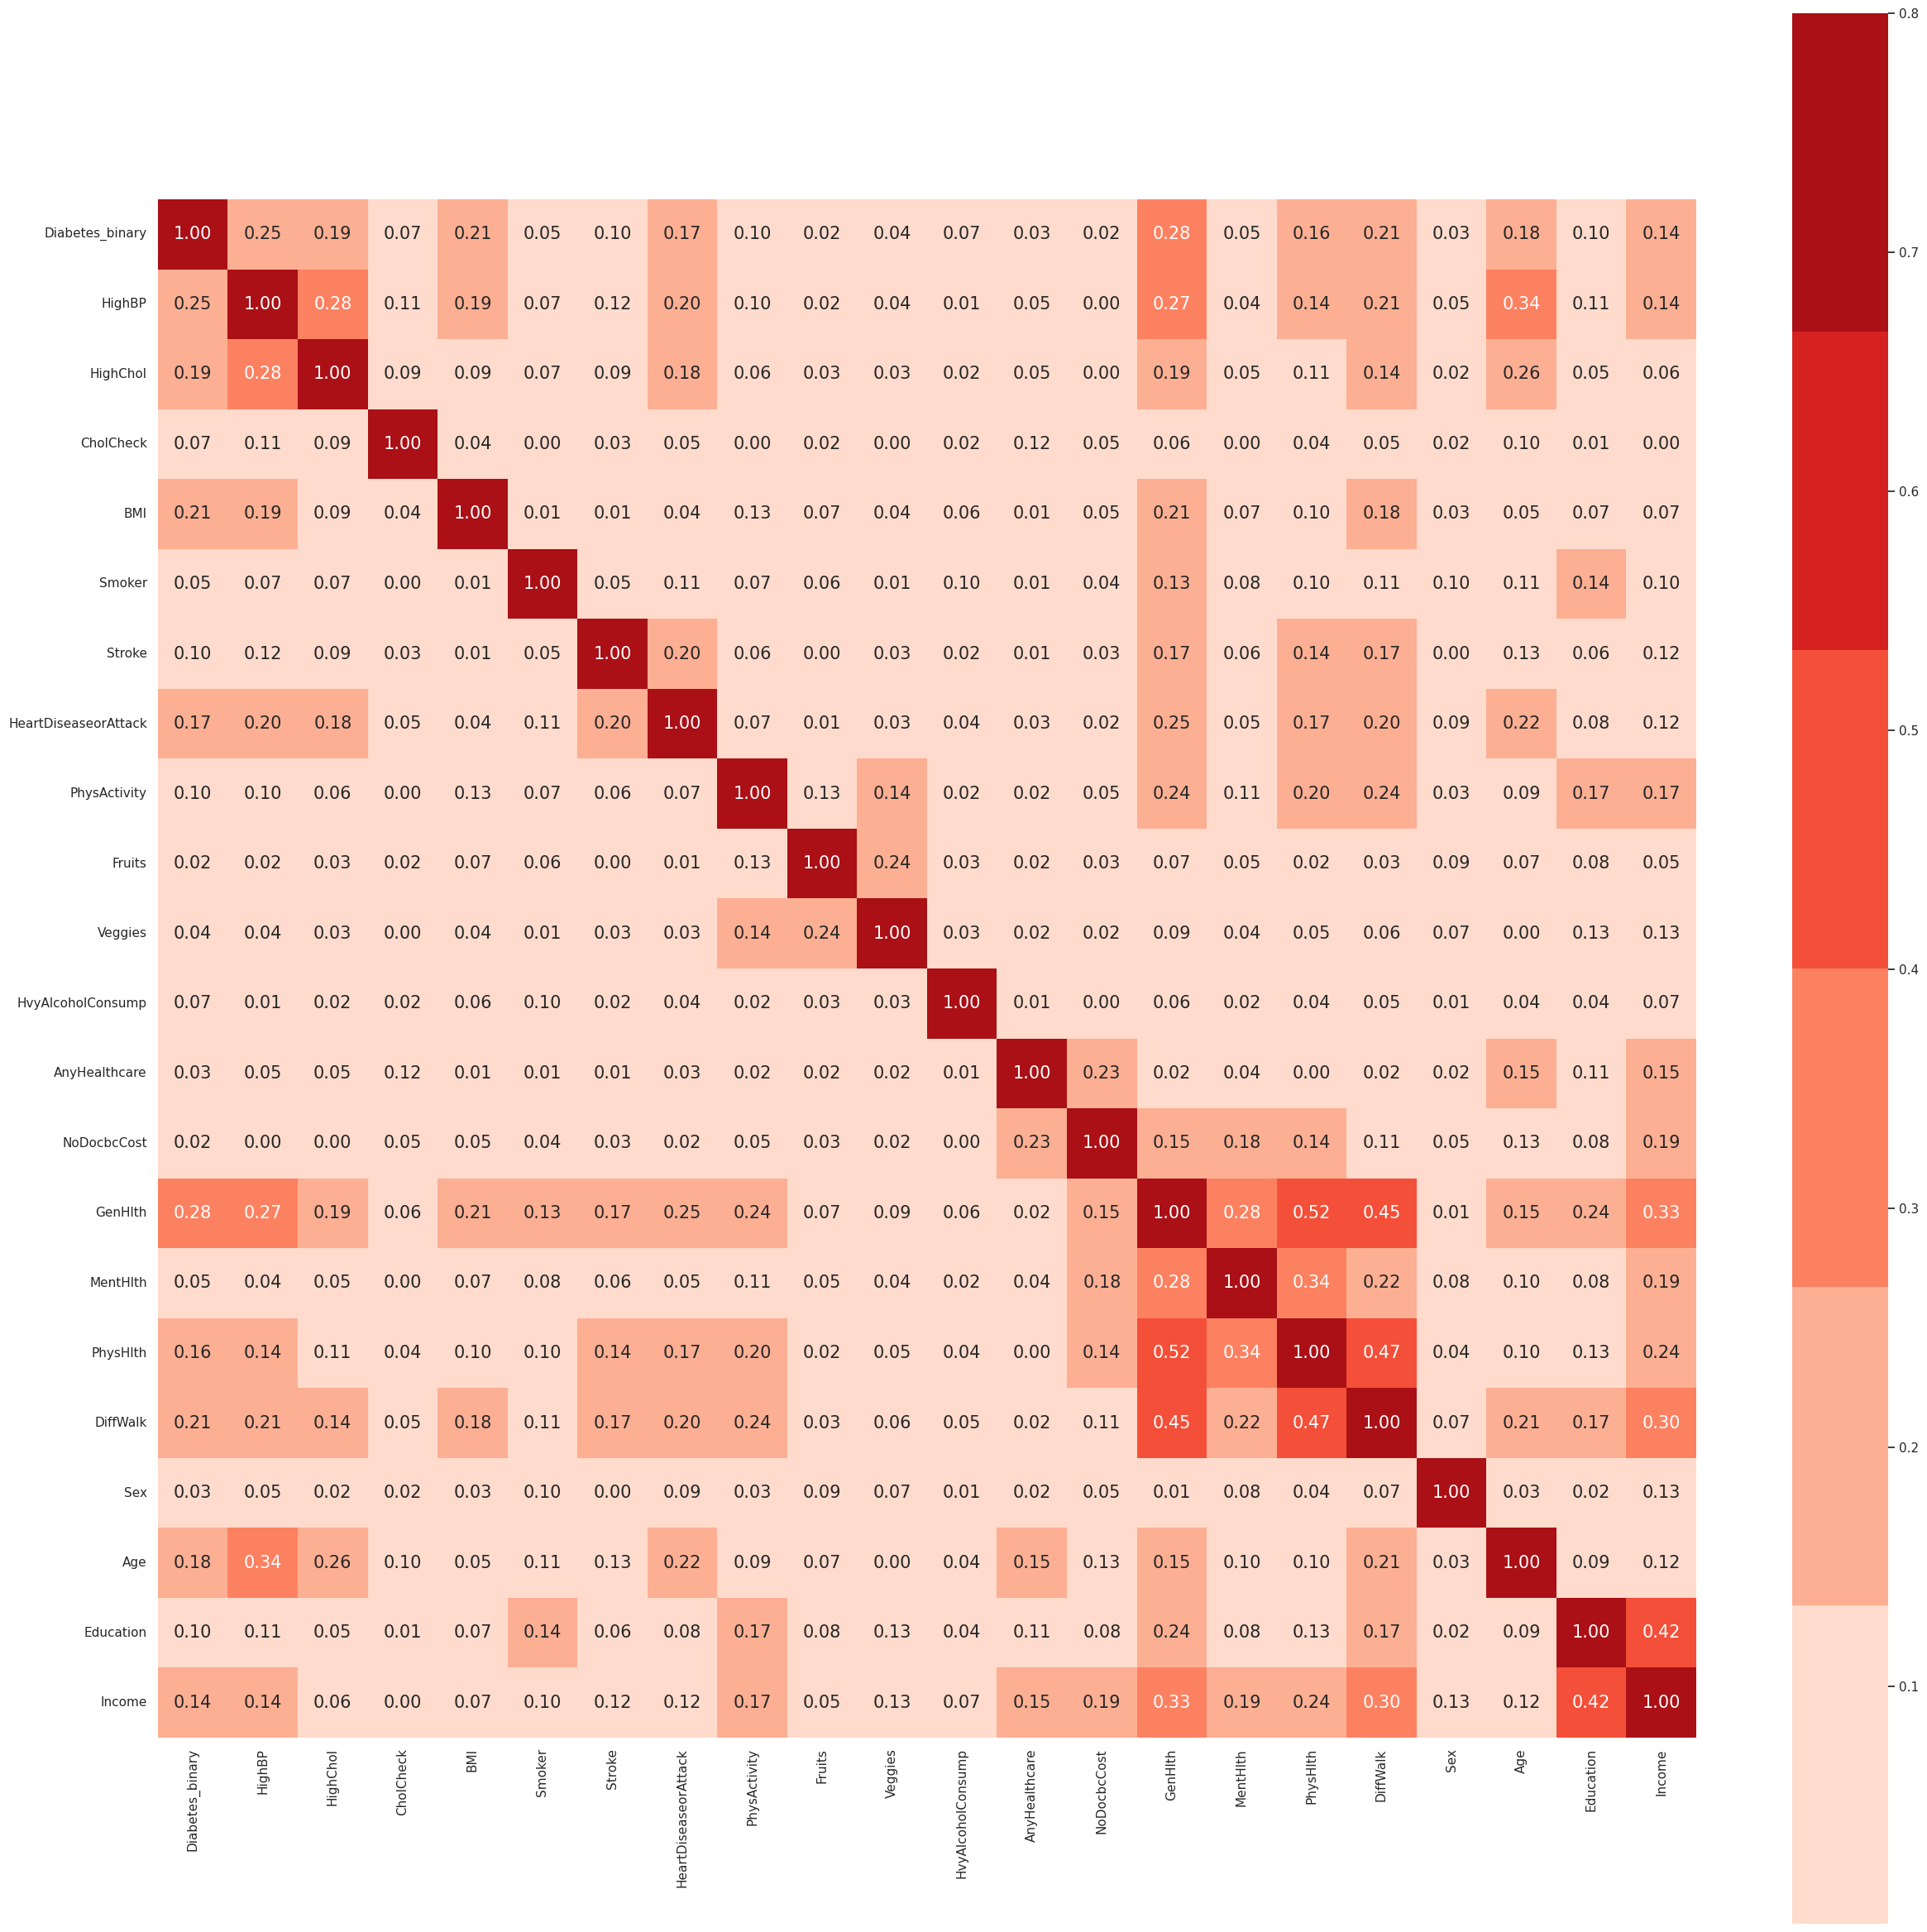

In [ ]:
# Correlation Heatmap
corr_matrix  = df.corr().abs()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

In [ ]:
# Get the absolute correlation values for each attribute pair
abs_corr_values = corr_matrix.abs()

# Filter attribute pairs with correlation coefficients between 0.3 and 0.7
filtered_corr_pairs = abs_corr_values.unstack().sort_values(ascending=False)
filtered_corr_pairs = filtered_corr_pairs[(filtered_corr_pairs >= 0.3) & (filtered_corr_pairs <= 0.7)]

# Display the filtered attribute pairs
print(filtered_corr_pairs)


PhysHlth   GenHlth      0.516476
GenHlth    PhysHlth     0.516476
DiffWalk   PhysHlth     0.466852
PhysHlth   DiffWalk     0.466852
GenHlth    DiffWalk     0.446696
DiffWalk   GenHlth      0.446696
Income     Education    0.419045
Education  Income       0.419045
MentHlth   PhysHlth     0.340191
PhysHlth   MentHlth     0.340191
Age        HighBP       0.339802
HighBP     Age          0.339802
Income     GenHlth      0.331782
GenHlth    Income       0.331782
dtype: float64


In [ ]:
# PCA (Principle Component Analysis) to reduce data dimension (however not required in this project because no highly correlated features)

# Machine Learning Algorithm

In [ ]:
# Machine Leaning - by this phase, data must be numerical

## Logistic Regression

This is to check performance on training set after applying SMOTE:

In [ ]:
#from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
#logreg.fit(X_res, y_res) #Train model
#check performance on training set (after applying SMOTE)
#print('Training accuracy: ', logreg.score(X_res,y_res))

This is to check performance on training set without applying SMOTE:

In [ ]:
#from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
#logreg.fit(X_train, y_train) #Train model
#check performance on training set without SMOTE
#print('Training accuracy: ', logreg.score(X_train,y_train))

For Logistic Regression, I continue my prediction analysis using set that USE SMOTE:

### 1. Train Logistic Regression Model

This is to check performance on training set after applying SMOTE:

In [ ]:
#to begin logistic regression model analysis----------------------------------------------------
from sklearn.linear_model import LogisticRegression
import numpy as np

# Reshape y_res to a 1-dimensional array
y_res = np.ravel(y_res)

logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
logreg.fit(X_res, y_res) #Train model
#check performance on training set (after applying SMOTE)
print('Training accuracy: ', logreg.score(X_res,y_res)) #TRAINING ACCURACY BEFORE TUNING

Training accuracy:  0.7316831173794492


### 2. Hyperparameter Tuning before Testing

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning - Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'] 
}

logistic_grid = GridSearchCV(logreg, param_grid, cv=5)
logistic_grid.fit(X_res, y_res)

# Get the best parameters and model
best_params = logistic_grid.best_params_
best_logistic = logistic_grid.best_estimator_
best_logistic.fit(X_res, y_res)

# Check performance on training set after tuning
print('Best hyperparameters found during tuning:' ,best_params)
print('Training accuracy after tuning: ', best_logistic.score(X_res, y_res))  #TRAINING ACCURACY AFTER TUNING

KeyboardInterrupt: 

Analysis: The logistic regression model was initially trained on the dataset with a training accuracy of approximately 73.17%. After hyperparameter tuning using grid search with cross-validation, the best hyperparameters were found to be a regularization strength (C) of 100 and a solver method of 'sag'. Despite this tuning, the training accuracy only slightly changed to approximately 73.17%. This suggests that the chosen hyperparameters may not have significantly impacted the model's performance. It's possible that logistic regression, being a relatively simple model, may have reached its performance limit on the given dataset, or that the dataset itself may not be conducive to further improvements through hyperparameter tuning alone. 

### 3. Predict on the Test Set using Best LR Model

In [ ]:
# Predict on the test set using the best logistic regression model
y_pred_lr = best_logistic.predict(X_test) 

# Print the predictions
print("Predictions on the test set after tuning:", y_pred_lr) 

NameError: name 'best_logistic' is not defined

In [ ]:
y_test = y_test.ravel()

### 4. Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy of the logistic regression model on the test set.
testing_accuracy = accuracy_score(y_test, y_pred_lr)#TESTING ACCURACY AFTER TUNING
 
# Calculate precision, recall, and F1-score for the test set
testing_precision = precision_score(y_test, y_pred_lr)
testing_recall = recall_score(y_test, y_pred_lr)
testing_f1_score = f1_score(y_test, y_pred_lr)

# Print evaluation metrics for the testing set
print("Logistic Regression Evaluation Scores (Testing Set):")
print(f"Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")

NameError: name 'y_pred_lr' is not defined

Result: 

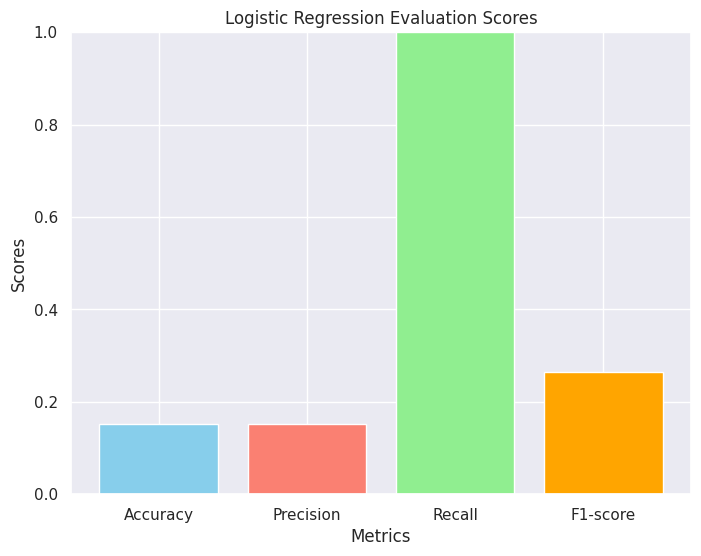

In [ ]:
import matplotlib.pyplot as plt

# Evaluation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [0.1529, 0.1529, 1.0000, 0.2653]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Evaluation Scores')
plt.ylim(0, 1) 
plt.show()



### 5. Heatmap for Logistic Regression

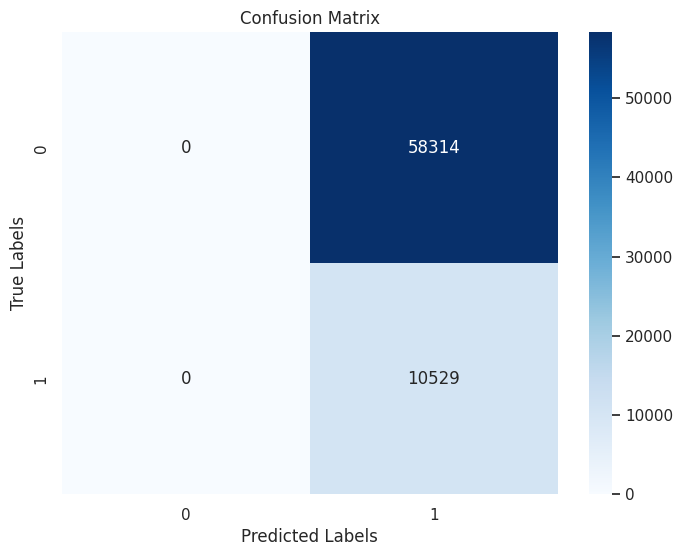

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Analysis: This is a confusion matrix that shows the performance of a classification model, possibly logistic regression, on a test dataset. The confusion matrix compares the predicted labels with the true labels of the instances. A confusion matrix has four cells: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Each cell represents the number of instances that fall into that category. For example, TP means that the model correctly predicted the positive class, while FP means that the model incorrectly predicted the positive class.

In this confusion matrix, the positive class is 1 and the negative class is 0. The model has predicted 58,314 instances correctly as class 1 (TP) and 10,529 instances incorrectly as class 1 (FP). There are no instances where the model predicted class 0 (TN or FN). This means that the model is very biased towards the positive class and does not recognize the negative class at all. This could indicate a problem with the model, the data, or the evaluation method.

### 6. Testing and Training Test Comparison

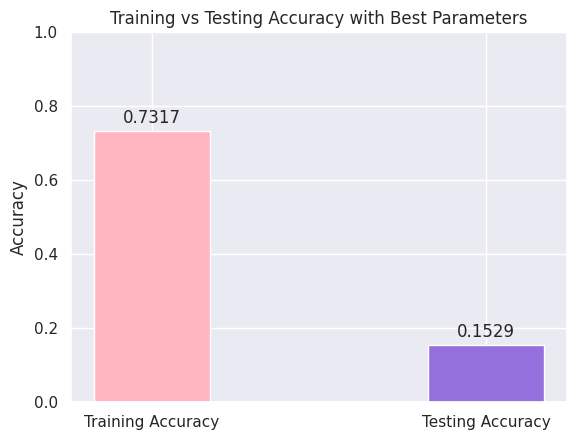

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
training_accuracy_best_param = best_logistic.score(X_res, y_res)
testing_accuracy_best_param = accuracy_score(y_test, y_pred_lr)

# Colors
colors = ['lightpink', 'mediumpurple']

# Labels
labels = ['Training Accuracy', 'Testing Accuracy']
values = [training_accuracy_best_param, testing_accuracy_best_param]

# Plot
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, values, width, color=colors)

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy with Best Parameters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

Conclusion: Logistic regression is a relatively simple model, and hyperparameter tuning may not lead to significant improvements compared to more complex models.

Final conclusion: The lower accuracy observed in logistic regression for testing data can be attributed to several factors. Firstly, logistic regression assumes balanced classes, but if there is a significant class imbalance in the dataset, accuracy may not adequately reflect the model's performance. Secondly, logistic regression assumes a linear relationship between features and the log-odds of the outcome, which might not capture complex or nonlinear relationships effectively. Additionally, logistic regression is a relatively simple model compared to others, and if the relationship in the data is intricate, logistic regression might struggle to capture it accurately. 

## K-Nearest Neighbour

## Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_res, y_res)

# Predict the labels for the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy:", accuracy_knn)

Test Accuracy: 0.7584794387228913


In [ ]:
print('Training accuracy: ', knn_classifier.score(X_res,y_res))
#print('Testing accuracy: ', knn_classifier.score(X_test, y_test))

Training accuracy:  0.874157559365882


In [ ]:
from sklearn.metrics import classification_report

knn_pred = knn_classifier.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     58314
           1       0.25      0.30      0.28     10529

    accuracy                           0.76     68843
   macro avg       0.56      0.57      0.57     68843
weighted avg       0.78      0.76      0.77     68843



## Finding the best number of k

Testing accuracy 0.7534244585506151


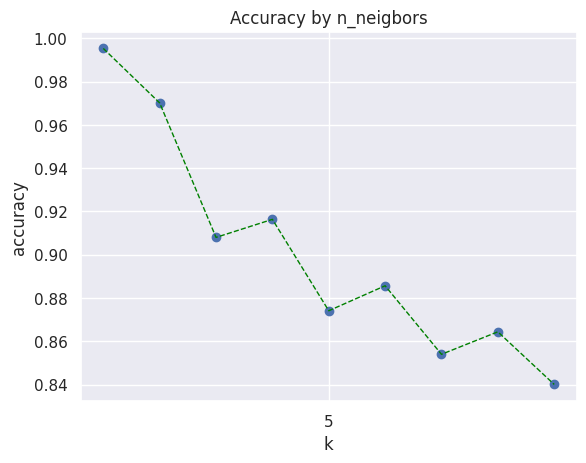

In [ ]:
k_range = range(1,10)
scores = []

for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn3.fit(X_res, y_res)
    knn3_pred = knn3.predict(X_res)
    scores.append(knn3.score(X_res, y_res))
print('Testing accuracy',knn3.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10]);
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
plt.show()

## Testing

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

training_accuracy_knn = knn_classifier.score(X_res, y_res)

# Calculate accuracy, precision, recall & f1 of the knn model on the test set.
testing_accuracy_knn = accuracy_score(y_test, y_pred_knn)
testing_precision_knn = precision_score(y_test, y_pred_knn)
testing_recall_knn = recall_score(y_test, y_pred_knn)
testing_f1_score_knn = f1_score(y_test, y_pred_knn)

# Print evaluation metrics for the testing set
print("k-Nearest Neighbours Evaluation Scores (Testing Set):")
print(f"Accuracy: {testing_accuracy_knn:.4f}")
print(f"Precision: {testing_precision_knn:.4f}")
print(f"Recall: {testing_recall_knn:.4f}")
print(f"F1-score: {testing_f1_score_knn:.4f}")

k-Nearest Neighbours Evaluation Scores (Testing Set):
Accuracy: 0.7585
Precision: 0.2546
Recall: 0.3004
F1-score: 0.2756


## Evaluation

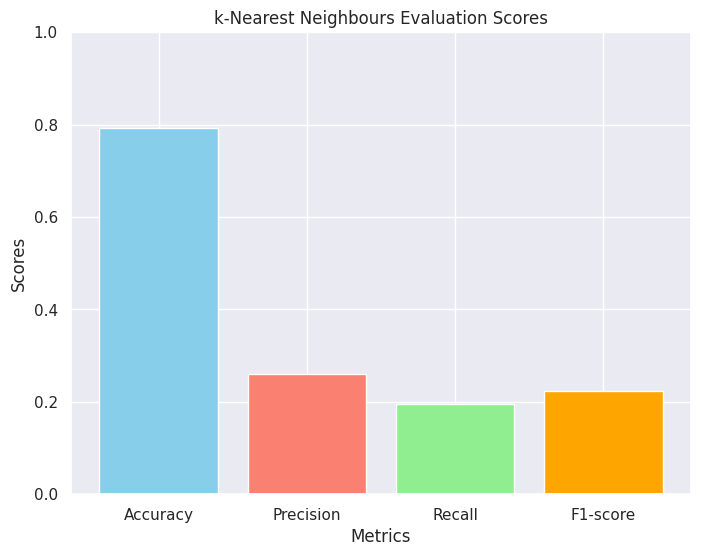

In [ ]:
import matplotlib.pyplot as plt

# Evaluation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [0.7923, 0.2611, 0.1957, 0.2237]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('k-Nearest Neighbours Evaluation Scores')
plt.ylim(0, 1) 
plt.show()


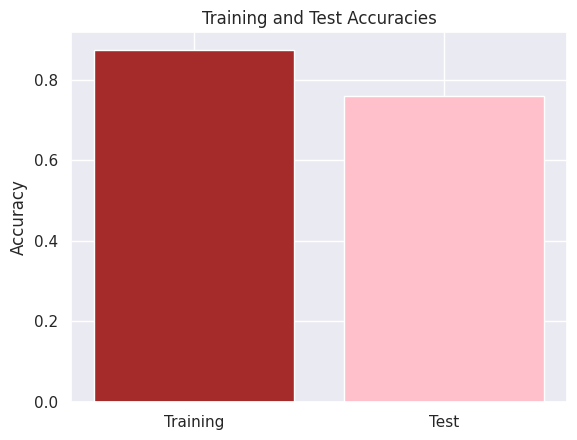

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
labels = ['Training', 'Test']
scores = [training_accuracy_knn, testing_accuracy_knn]

plt.bar(labels, scores, color=['brown', 'pink'])
plt.title('Training and Test Accuracies')
plt.ylabel('Accuracy')
plt.show()

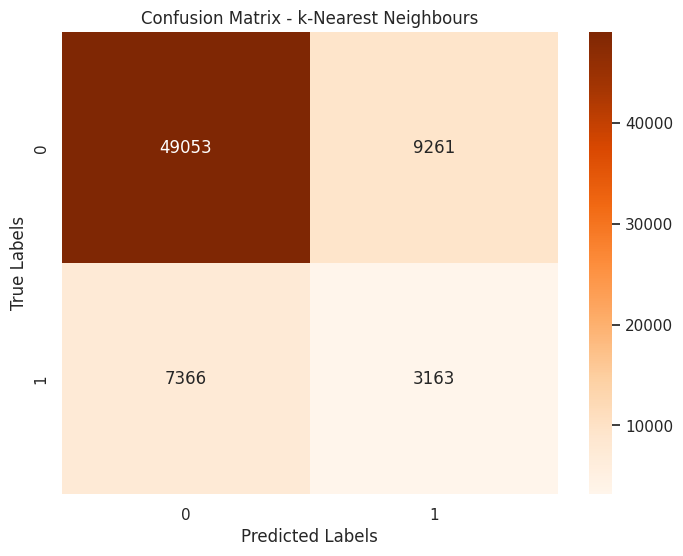

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for k-Nearest Neighbours
conf_matrix_bnb = confusion_matrix(y_test, y_pred_knn)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - k-Nearest Neighbours")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Naive Bayes

### Training

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize Bernoulli Naive Bayes classifier
bnb_classifier = BernoulliNB()

# Train the classifier
bnb_classifier.fit(X_res, y_res)

# Make predictions on the test set
y_pred_train = bnb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", bnb_classifier.score(X_res,y_res))
print("Test Accuracy:", accuracy)

Train Accuracy: 0.68020328818268
Test Accuracy: 0.6832502941475531


### Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Try different values for alpha
    'binarize': [0.0, 0.1, 0.5],  # Try different values for binarize threshold
    'fit_prior': [True, False]  # Try different options for fit_prior
}

# Initialize GridSearchCV
bnb_grid_search = GridSearchCV(estimator=bnb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross-Validation
bnb_grid_search.fit(X_res, y_res)

# Get the best parameters and best score
best_params = bnb_grid_search.best_params_
best_score = bnb_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'alpha': 0.5, 'binarize': 0.1, 'fit_prior': True}
Best Score: 0.6836318546651005


### Testing

In [ ]:
# Train the model with the best parameters
best_bnb = grid_search.best_estimator_
best_bnb.fit(X_res, y_res)

train_accuracy_bnb = best_bnb.score(X_res,y_res)

# Make predictions on the test set
y_pred_bnb = best_bnb.predict(X_test)

# Evaluate the model
accuracy_bnb = accuracy_score(y_test, y_pred)
precision_bnb = precision_score(y_test, y_pred)
recall_bnb = recall_score(y_test, y_pred)
f1_bnb = f1_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy_bnb)
print("Test Accuracy:", accuracy_bnb)
print("Precision:", precision_bnb)
print("Recall:", recall_bnb)
print("F1-score:", f1_bnb)

Train Accuracy: 0.6863511755583811
Test Accuracy: 0.6763795883386837
Precision: 0.27690438216754004
Recall: 0.6925633963339348
F1-score: 0.3956270515150692


In summary, cross-validation provides a more robust estimate of a model's performance by averaging over multiple train-test splits, thus reducing the variance of the performance estimate. It is a valuable tool for model evaluation and selection in machine learning tasks.

In [ ]:
from sklearn.model_selection import cross_val_score
# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_res, y_res, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.66835704 0.70513551 0.707322   0.70576022 0.70711989]
Mean CV Accuracy: 0.6987389311638577


### Evaluation

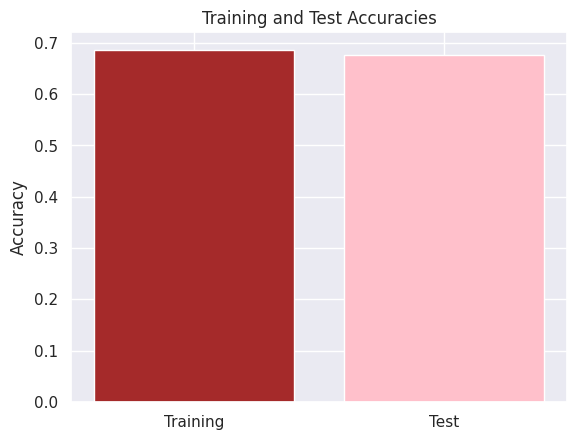

Training Accuracy with Best Parameters: 0.6863511755583811
Test Accuracy with Best Parameters: 0.6763795883386837


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated the training_accuracy and test_accuracy

# Create a bar plot
labels = ['Training', 'Test']
scores = [train_accuracy_bnb, accuracy_bnb]

plt.bar(labels, scores, color=['brown', 'pink'])
plt.title('Training and Test Accuracies')
plt.ylabel('Accuracy')
plt.show()

print("Training Accuracy with Best Parameters:", train_accuracy_bnb)
print("Test Accuracy with Best Parameters:", accuracy_bnb)

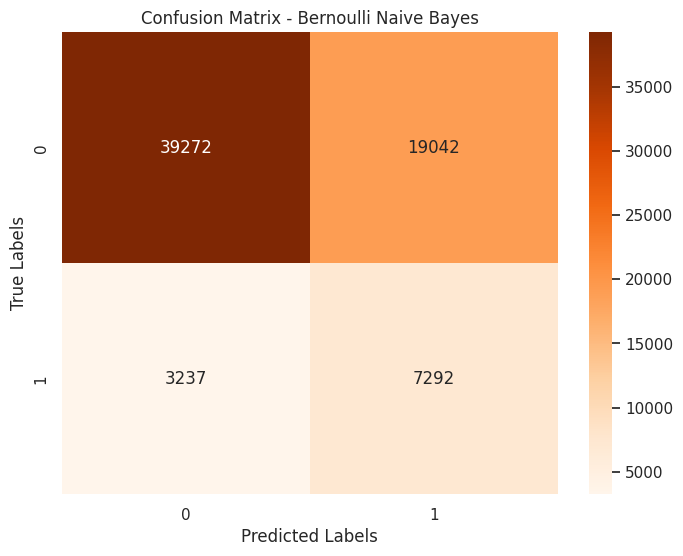

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for Bernoulli Naive Bayes
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Random Forest

### Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs =-1, random_state = 42)
rf.fit(X_res,y_res)

RandomForestClassifier(n_jobs=-1, random_state=42)

To obtain the optimal parameters for the training set, the outcomes of the grid search optimization, highlighting the best parameters, are provided below.

### Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


y_res = y_res.ravel()

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_res, y_res)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

res_predictions = best_model.predict(X_res)

training_accuracy = accuracy_score(res_predictions, y_res)

print("Best Parameters:", best_params)
print("Training Accuracy:", training_accuracy)


too high accuracy score may consider as overfitting, model cannot learn or capture well for the best classification.

code below tune the Random Forest Classifier parameters and add some parameters in order to get the best training score for accuracy result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with adjusted parameters
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,  
                            min_samples_split=5,  
                            min_samples_leaf=2,   
                            max_features='sqrt',
                            random_state=42,
                            n_jobs=-1)

# Training the random forest classifier
rf.fit(X_res, y_res)

# Make predictions on the training set
training_predictions = rf.predict(X_res)

# Calculate accuracy score on the training set
training_accuracy = rf.score(X_res, y_res)

print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.7706944577144411


to make sure model is predicted well and not overfitting or underfitting, code below are used with test set, unseen data to compare with previous training result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier with adjusted parameters
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,  
                            min_samples_split=5,  
                            min_samples_leaf=2,   
                            max_features='sqrt',
                            random_state=42,
                            n_jobs=-1)

# Train the random forest classifier on the resampled training set
rf.fit(X_res, y_res)

# Make predictions on the test set
test_predictions = rf.predict(X_test)

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(test_predictions, y_test)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.5901398835030431


since the result for test accuracy is lower than the training result, we decided to use the gridsearchCV. To avoid extended runtime issues, the optimization of model parameters for the test set also has been performed in a separate file within the local environment. The resulting best parameters have been obtained, ensuring a more efficient and streamlined process.

### Testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


y_res = y_res.ravel()
y_test = y_test.ravel()

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_res, y_res)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

test_predictions = best_model.predict(X_test)

test_accuracy = accuracy_score(test_predictions, y_test)

print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Test Accuracy: 0.7411211016370582


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier with the best parameters
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=30,
    n_jobs=-1,
    random_state=42
)

# Train the random forest classifier with the best parameters
best_rf.fit(X_res, y_res)

# Make predictions on the test set using the newly trained model
test_predictions = best_rf.predict(X_test)

# Evaluate the accuracy of the model on the test set
test_accuracy = accuracy_score(test_predictions, y_test)

# Print the results
print("Best Parameters:", best_rf.get_params())
print("Test Accuracy with Best Parameters:", test_accuracy)


Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Test Accuracy with Best Parameters: 0.7411211016370582


Since result for testing set is higher by using gridsearchCV compared to before, hence we will use it for next step.

Next, comparison are made between the result of accuracy for Training and Test set by visualise them into bar plot. 

### Evaluation

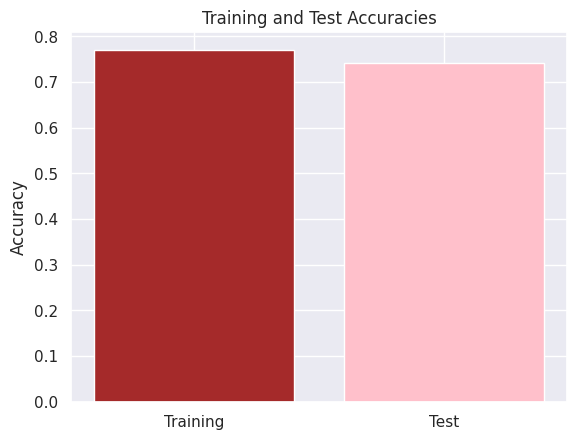

Training Accuracy with Best Parameters: 0.7706944577144411
Test Accuracy with Best Parameters: 0.7411211016370582


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated the training_accuracy and test_accuracy

# Create a bar plot
labels = ['Training', 'Test']
scores = [training_accuracy, test_accuracy]

plt.bar(labels, scores, color=['brown', 'pink'])
plt.title('Training and Test Accuracies')
plt.ylabel('Accuracy')
plt.show()

print("Training Accuracy with Best Parameters:", training_accuracy)
print("Test Accuracy with Best Parameters:", test_accuracy)


- A drop in training and test set are not too extreme as it still generalized that the model is reasonably well to unseen data. 

- A test accuracy of 74% is a reasonable result, but the performance could be influenced by various factors, including the characteristics of the data and the complexity of the problem.

- The drop in accuracy from training to test suggests that the model is not severely overfitting, which is positive. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a random forest classifier with the best parameters
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=30,
    n_jobs=-1,
    random_state=42
)

# Train the random forest classifier with the best parameters
best_rf.fit(X_res, y_res)

test_predictions_rf = best_rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for the test set
testing_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
testing_precision_rf = precision_score(y_test, test_predictions_rf)
testing_recall_rf = recall_score(y_test, test_predictions_rf)
testing_f1_score_rf = f1_score(y_test, test_predictions_rf)

print("Random Forest Evaluation Scores (Testing Set):")
print(f"Accuracy: {testing_accuracy_rf:.4f}")
print(f"Precision: {testing_precision_rf:.4f}")
print(f"Recall: {testing_recall_rf:.4f}")
print(f"F1-score: {testing_f1_score_rf:.4f}")


Random Forest Evaluation Scores (Testing Set):
Accuracy: 0.7411
Precision: 0.2918
Recall: 0.4854
F1-score: 0.3645


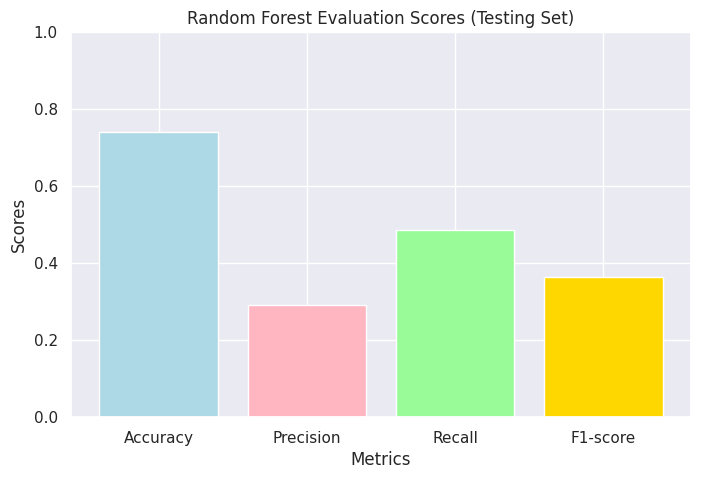

In [ ]:
import matplotlib.pyplot as plt

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [testing_accuracy_rf, testing_precision_rf, testing_recall_rf, testing_f1_score_rf]
colors = ['#add8e6', '#ffb6c1', '#98fb98', '#ffd700']  # Pastel colors: LightBlue, LightPink, PaleGreen, Gold

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=colors)
plt.title('Random Forest Evaluation Scores (Testing Set)')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  
plt.show()


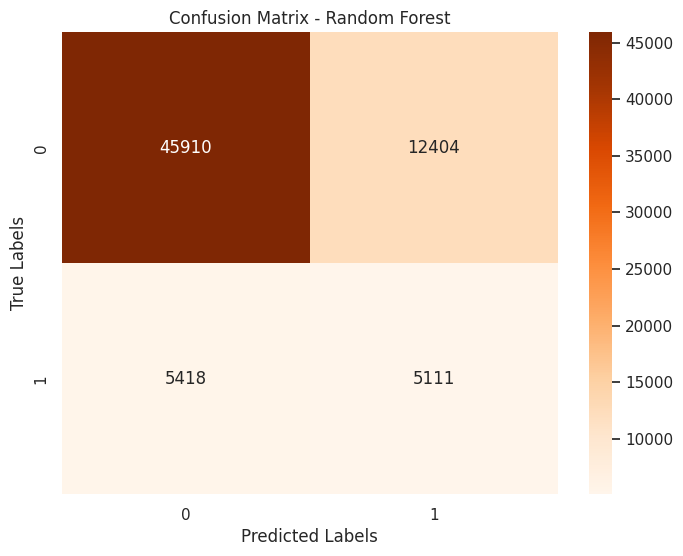

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Model Comparison 

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_bnb = accuracy_score(Y_test, Y_pred_nb)
accuracy_ranfor = accuracy_score(test_predictions, y_test)

NameError: name 'y_pred_lr' is not defined

In [ ]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Naive Bayes: " + str(accuracy_bnb * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 15.294220182153595
Random Forest: 74.11211016370582


In [ ]:
import pandas as pd

data = {
    "Model": ["Logistic Regression", "k-Nearest Neighbours", "Naive Bayes", "Random Forest"],
    "Training Acc.": [0.7317, 0.8741, 0.6864, 0.770558],
    "Testing Acc.": [0.1529, 0.7585, 0.6764, 0.739770]
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                  Model  Training Acc.  Testing Acc.
0   Logistic Regression       0.891784        0.1529
1  k-Nearest Neighbours       0.874100        0.7585
2           Naive Bayes       0.686400        0.6764
3         Random Forest       0.706934        0.7398


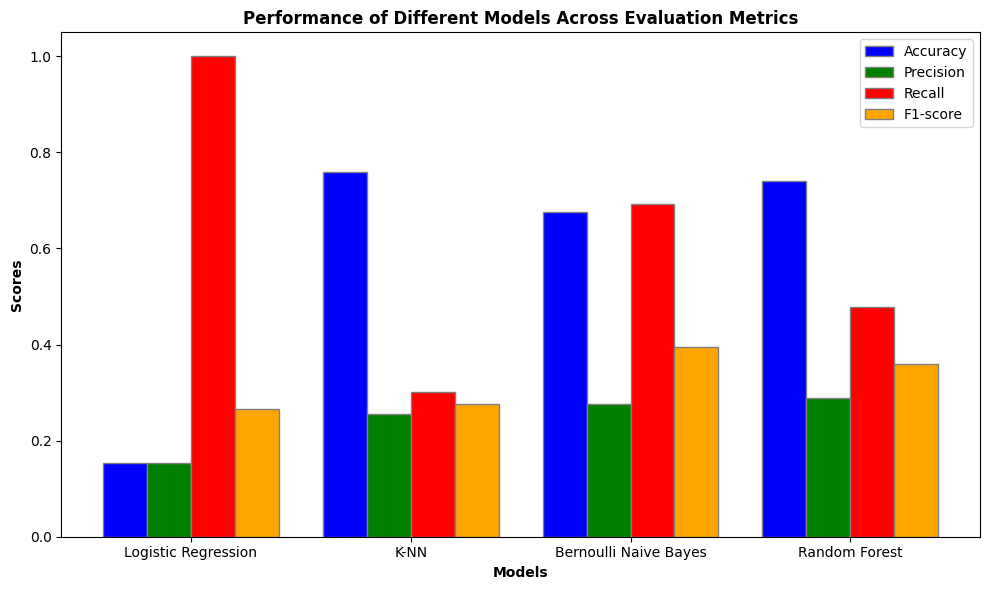

In [ ]:
import matplotlib.pyplot as plt

# Data for the four datasets and their evaluation metrics
datasets = ['Logistic Regression', 'K-NN', 'Bernoulli Naive Bayes', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
accuracy = [0.1529, 0.7585, 0.6764, 0.739770]  
precision = [0.1529, 0.2546, 0.2769, 0.2885]  
recall = [1.0000, 0.3004, 0.6926, 0.4783]  
f1_score = [0.2653, 0.2756, 0.3956, 0.3599]  

# Define the width of each bar
bar_width = 0.2

plt.figure(figsize=(10, 6)) 

# Set the positions of the bars on the x-axis
r1 = range(len(datasets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the grouped bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='grey', label='F1-score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(datasets))], datasets)
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance of Different Models Across Evaluation Metrics', fontweight='bold')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
#From the above comparison, we can observe that Random Forest gets the highest accuracy of 74%
#to be change if KNN and Naive Bayes get higher result

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_predictions, y_test)#to be change if KNN and Naive Bayes get higher result
cm

array([[45910,  5418],
       [12404,  5111]])

<AxesSubplot: >

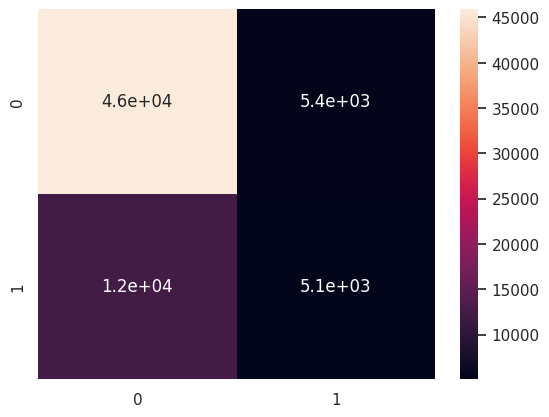

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(test_predictions, y_test))#to be change if KNN and Naive Bayes get higher result

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     51328
           1       0.49      0.29      0.36     17515

    accuracy                           0.74     68843
   macro avg       0.64      0.59      0.60     68843
weighted avg       0.71      0.74      0.72     68843



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
input_data = np.array([[1,1,1,26,0,0,0,1,1,1,0,1,1,3,2,5,0,0,1,5,1]
])

# Extract the BMI column
bmi_column = input_data[:, 3]  # Assuming BMI is the 4th column (index 3)

# Reshape the BMI column for MinMaxScaler
bmi_column_reshaped = bmi_column.reshape(-1, 1)

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform only the BMI column
scaled_bmi_column = min_max_scaler.fit_transform(bmi_column_reshaped)

# Replace the original BMI column with the scaled values
input_data_scaled = np.copy(input_data)
input_data_scaled[:, 3] = scaled_bmi_column.flatten()

print("Scaled Input Data:")
print(input_data_scaled)

prediction = knn_classifier.predict(input_data_scaled)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Scaled Input Data:
[[1 1 1 0 0 0 0 1 1 1 0 1 1 3 2 5 0 0 1 5 1]]
[0]
The person is not diabetic
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f98d19e4-1909-459a-be21-3b67e1e716c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>